# Random Forest Classifier

# References


[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[Evaluating a Random Forest modelEvaluating a Random Forest model](https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56)

[sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    
# References

In [1]:
import numpy as np
import pandas as pd

In [2]:
my_data = pd.read_csv("./data/drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
X = my_data[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [4]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(["F", "M"])
X[:, 1] = le_sex.transform(X[:, 1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit(["LOW", "NORMAL", "HIGH"])
X[:, 2] = le_BP.transform(X[:, 2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(["NORMAL", "HIGH"])
X[:, 3] = le_Chol.transform(X[:, 3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [5]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred)

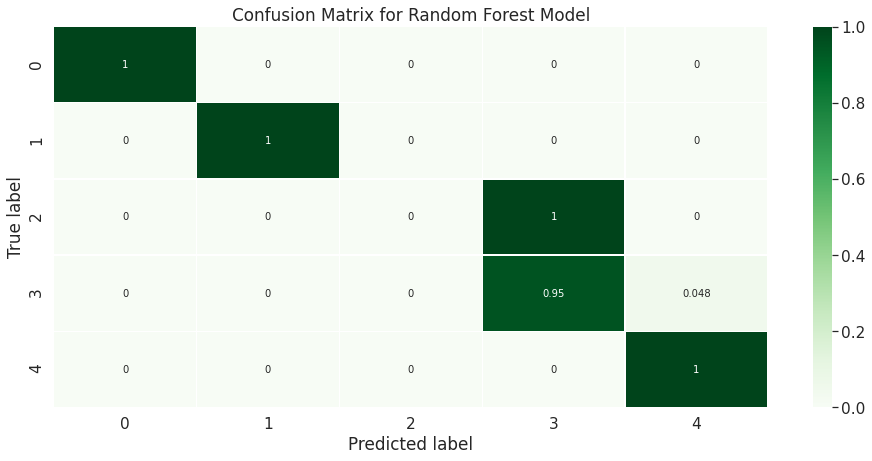

In [11]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)
sns.heatmap(
    matrix, annot=True, annot_kws={"size": 10}, cmap=plt.cm.Greens, linewidths=0.2
)

# Add labels to the plot
# class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
#                'Cottonwood/Willow', 'Aspen', 'Douglas-fir',
#                'Krummholz']
# tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
# plt.xticks(tick_marks, class_names, rotation=25)
# plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [12]:
from sklearn.metrics import classification_report

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      0.00      0.00         5
       drugX       0.80      0.95      0.87        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.90        60
   macro avg       0.95      0.79      0.77        60
weighted avg       0.91      0.90      0.86        60

